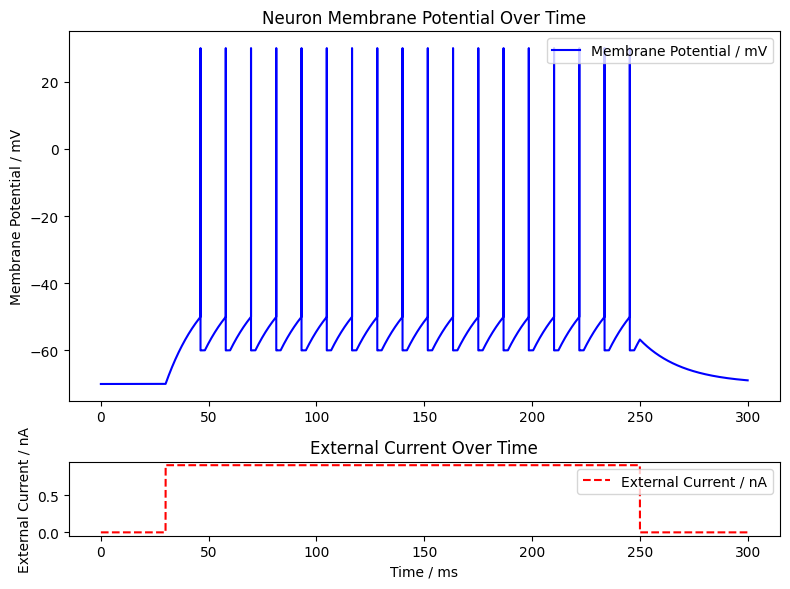

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# 计算下一个膜电位的函数
def calc_next_step(Vm, I, step_t, remaining_refrac_time):
    Vl = -70
    Gl = 0.025
    C = 0.5
    # 使用 np.logical_and 进行元素级别的判断
    if np.logical_and(Vm > -50, Vm < 0):  # Threshold
        Vm = 30  # Spike potential
    elif Vm > 0:
        Vm = -60  # Reset potential
        remaining_refrac_time = remaining_refrac_time * 0 + 2  # Reset everything to 2
    elif remaining_refrac_time > 0:
        Vm = -60  # Reset potential
        remaining_refrac_time -= step_t
    else:
        Vm = Vm + step_t * (-Gl * (Vm - Vl) + I) / C
    
    if remaining_refrac_time < 0:
        remaining_refrac_time = remaining_refrac_time * 0
    
    return Vm, remaining_refrac_time

I0=0.9
t_begin=30
t_end=250

# 外部电流的函数形式 (方波电流)
def external_current(t):
    # 电流为1在200ms到300ms之间，其他时间为0
    return I0 if t_begin <= t <= t_end else 0

# Time and parameters
step_t = 0.001
t = np.arange(0, 300 + step_t, step_t).astype(np.float64)  # Ensure t is float type
Vm_out = np.zeros(np.shape(t)[0])
remaining_refrac_time = 0

# 初始化变量
Vm_out[0] = -70  # 初始膜电位
ind = 0

# 模拟神经元反应
for tt in t[0:-1]:
    I = external_current(tt)  # 使用外部电流函数
    Vm_out[ind + 1], remaining_refrac_time = calc_next_step(Vm_out[ind], I, step_t, remaining_refrac_time)
    ind += 1

# 创建一个带有自定义高度比例的图形
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1])  # 第一个子图占更多空间

# 在第一个子图中绘制膜电位
ax0 = plt.subplot(gs[0])
ax0.plot(t, Vm_out, label="Membrane Potential / mV", color='blue')
ax0.set_ylabel("Membrane Potential / mV")
ax0.set_title("Neuron Membrane Potential Over Time")
ax0.legend(loc="upper right")

# 在第二个子图中绘制外部电流
ax1 = plt.subplot(gs[1])
# 为了方便绘制外部电流，创建一个电流数组
I_values = np.array([external_current(tt) for tt in t])
ax1.plot(t, I_values, label="External Current / nA", color='red', linestyle='--')
ax1.set_xlabel("Time / ms")
ax1.set_ylabel("External Current / nA")
ax1.set_title("External Current Over Time")
ax1.legend(loc="upper right")

# 调整布局以防止重叠
plt.tight_layout()

# 显示图形
plt.show()
